In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Question 1 : Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [2]:
#!wget -P data/ https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

In [3]:
#!wget -P data/ https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet

In [4]:
jan = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')

In [5]:
feb = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

In [6]:
jan.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0


In [7]:
jan.shape

(2463931, 19)

### Question 2 : Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [9]:
jan['duration'] = jan.tpep_dropoff_datetime - jan.tpep_pickup_datetime

In [10]:
jan.duration = jan.duration.apply(lambda td: td.total_seconds() / 60)

In [11]:
jan.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667


In [12]:
jan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,2463931.0,1.707819,0.502137,1.00,1.000000,2.000000,2.000000,6.000000
passenger_count,2392428.0,1.389453,0.982969,0.00,1.000000,1.000000,1.000000,9.000000
trip_distance,2463931.0,5.372751,547.871404,0.00,1.040000,1.740000,3.130000,306159.280000
RatecodeID,2392428.0,1.415507,5.917573,1.00,1.000000,1.000000,1.000000,99.000000
PULocationID,2463931.0,166.076809,65.468057,1.00,132.000000,162.000000,234.000000,265.000000
DOLocationID,2463931.0,163.580716,70.790159,1.00,113.000000,162.000000,236.000000,265.000000
payment_type,2463931.0,1.194449,0.500178,0.00,1.000000,1.000000,1.000000,5.000000
fare_amount,2463931.0,12.946484,255.814887,-480.00,6.500000,9.000000,14.000000,401092.320000
extra,2463931.0,1.006710,1.236226,-4.50,0.000000,0.500000,2.500000,33.500000
mta_tax,2463931.0,0.491454,0.082916,-0.50,0.500000,0.500000,0.500000,16.590000


### Question 3 : Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [13]:
jan = jan[(jan.duration >= 1) & (jan.duration <= 60)]

In [14]:
jan.shape

(2421440, 20)

In [15]:
(2421440/2463931) * 100

98.27547930522405

### Question 4 : One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
- Turn the dataframe into a list of dictionaries
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [16]:
jan.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000


In [17]:
categorical = ['PULocationID', 'DOLocationID']

In [18]:
jan[categorical].head(1)

,PULocationID,DOLocationID
0,142,236


In [19]:
jan[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [20]:
jan[categorical] = jan[categorical].astype(str)

In [21]:
jan[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
#turn data frame into a dictionary
train_dicts = jan[categorical].to_dict(orient='records')

In [24]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [25]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

### Question 5 : Training a model

Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters
- Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [26]:
target = 'duration'
y_train = jan[target].values

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_train)

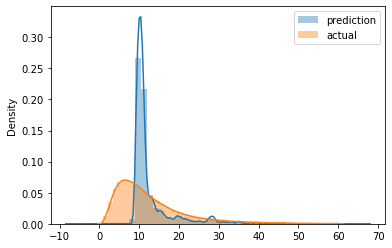

In [30]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_train, y_pred, squared=False)

6.986190135969309

**Validation**

In [41]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [42]:
df_train = read_dataframe('./data/yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

In [43]:
len(df_train), len(df_val)

(2421440, 2918187)

In [44]:
df_train.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000


In [45]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [46]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786389386061076

---